# Group Project - Temperature Estimation

## 1. Frame the Problem and Look at the Big Picture:
- Define the objective of your project in your own words.

    Die Aufgabe ist es, Machine Learning Modelle dazu zu nutzen, anhand eines Datensatzes der 13 verschiedene Atrribute eines Elektromotors enthält die Temperatur des innenliegenden Rotors zu bestimmen. Dazu sollen 3 verschiedene ML Modelle zum Einsatz kommen. Die Zielgröße ist die Rotortemperatur `pm`
 
 
- Select a performance criteria for evaluation of the task.

    Bei der Regression kommen ülicherweise die Performance Indikatoren RMSE und MAE zum Einsatz. Auch wir wählen diese um die Perforance der verschiedenen ML Modelle evaluieren zu können. Des weiteren kann man auch noch den MSE (Mean squared Error verwenden)
    
    
- Explain in a paragraph how you would solve the problem manually.

    In industriellen Applikationen wird die Rotortemperatur mittels Funk übertragen. Um diese Technik einsparen zu können, soll an dieser Stelle Machine Learning zum Einsatz kommen.
    
    
- List assumptions that you made so far.

    Bisher wurden noch keine spezifischen Annahmen getroffen. Wir wollen die Aufgabenstellung anhand von Supervised Learning lösen, da zu den gegebenen Attributen die Zielgröße (Rotortemperatur) gegeben ist. Des weiteren handelt es sich bei dem Problem um eine Regression und nicht um eine Classifikation, da hier konkrete Werte für die Rotortemperatur gesucht sind. Des Weiteren kann man sagen das hier mit offline Learning gearbeitet wird, da dem vorhandenen Datensatz keine neuen Werte hinzugefügt werden (batch learning)

## 2. Get the Data:

- Find and document where you can get the Data

    https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature
    
     
- Check the size and type of the data.

    Die Daten stehen im CSV Format zur Verfügung. Der Datensatz hat einen Speicherplatzbedarf von ca. 293 MB
    
    
- Sample a test set, put it aside, and never look at it (no data snooping!).
- Sample a training set and a validation set.

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Render plots inline
%matplotlib inline

In [2]:
# import the csv-data into a data frame, called "database"
database = pd.read_csv('measures_v2.csv', sep = ',')
# copy the database and name it "db"
db = database.copy()

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [14]:
db.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

Wie man aus der Informationsübersicht entnehmen kann, besteht der Datensatz aus insgesamt 13 Attributen. Die Datentypen sind im Datentyp float gegeben, ausser beim Attribut `profile_id`. Dieses Attribut gibt die Nummer der Messreihe an. Jede einzelne Messreihe (Reihe im Datensatz) kann durch diese ID identifiziert werden. Alle Werte sind numerisch und es gibt keine kategorischen Werte. Dies hilft beim späteren feature engineering. Es wird voraussichtlich kein one-hot-encoding notwendig sein. Die Größe des Datensatz ist mit 1.330.816 Reihen sehr groß. Daher kann es hilfreich sein den späteren Trainingsdatensatz für ein besseres Datenhandling erst einmal auf 30% der Gesamtgröße zu beschränken. Des Weiteren ist ersichtlich, dass keine Lücken im Datensatz vorhanden sind. Das zeigt der Befahl `db.isnull().sum()`. Somit müssen später keine fehlenden Daten rekonstruiert oder Zeilen aus dem Datensatz entfernt werden.

In [6]:
db.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [12]:
db.sample(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
907905,0.260801,87.832214,98.298559,-0.850421,94.424810,0.001776,-1.999951,1.099058,83.502339,90.137631,26.329987,-2.303667e-17,69
38350,83.126671,18.117258,49.639854,-85.310509,42.082127,1999.979370,-43.510658,132.616913,47.040073,33.294708,23.340176,1.018298e+02,12
510549,124.302094,18.820375,47.844292,-42.873917,42.776657,4499.953613,-91.234001,24.520723,55.510075,33.278599,24.306442,2.008767e+01,20
689952,-2.293624,38.743036,67.568030,0.824261,60.542318,-0.001876,-1.999930,1.098977,66.401282,52.784195,26.384509,6.799851e-27,68
738541,90.916129,39.672897,78.708214,-91.396907,65.587840,5392.121490,-139.924011,46.215613,65.970662,54.802197,26.589193,4.355006e+01,53
1172354,112.876671,49.699676,75.711236,-67.408660,68.880633,2924.381202,-44.678568,65.948001,66.090747,60.334618,24.779700,5.039062e+01,48
908168,0.200659,87.556552,92.114284,-0.864154,88.896230,0.000109,-2.000520,1.094327,82.364983,87.498380,26.335428,-1.946570e-55,69
441646,91.592949,18.571703,32.666130,-44.304874,31.339186,1959.980225,-13.556253,64.153557,42.376114,26.384521,20.540607,4.650299e+01,30
380235,34.545639,18.819818,111.541725,-125.584641,84.835785,5999.938965,-185.035843,56.748714,98.719322,56.610397,23.325243,5.483767e+01,31
1011330,127.661127,92.329450,87.782757,-1.534488,85.054605,4664.949860,-84.737485,-3.088374,76.286892,85.173316,25.047920,-3.486390e+00,73


Der Blick auf den Kopf des Datensatz sowie auf zufällige Zeilen zeigt, dass viele Zeilen der gleichen `profile_id` zugeordnet sind. Dies könnte ein Hinweis darauf sein, dass es sich bei diesem Datensatz um zeitabhängige Daten handelt. Dies ist bei der Aufteilung des Datensatz in Trainings und Testdaten ggfs. zu beachten!

In [9]:
db.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


Anhand des Befehls `describe()` lässt sich in der Spalte `profile_id` erkennen, dass der höchte Wert bei 81 und das Minimum bei 2 liegt. Daraus lässt sich schliessen, dass es der Datensatz insgesamt vermutlich 80 Messreihen enthält.

### Aufteilung des Datensatz
- Gesamtdatensatz wird in Trainings- und Testdaten unterteilt (80:20, da der Datensatz sehr groß ist)
- Die Trainingsdaten werden in Trainingsdaten und Validierungsdaten unterteilt (90:10) 

Der Validierungsdatensatz wird für das spätere Einstellung der Hyperparameter genutzt.

Macht hier "Stratified Sampling" Sinn? Ich denke nicht.

Zur besseren Übersicht wurde empfohlen nur 30% des gesamten Datensatzes zu betrachten. Bei der Aufteilung der Daten sollte auf die Zeitabhängigkeit geachtet werden oder noch einmal untersucht werden, ob die Zeitanhändigkeit der Daten wichtig für die Vorhersage ist.

Unterteilung der Gesamtdaten in Trainingsdaten und Testdaten

In [26]:
from sklearn.model_selection import train_test_split

train_val_set, test_set = train_test_split(db, test_size=0.2, random_state=100)

print("Lenght of train val set: " + str(len(train_val_set)))
print("Lenght of test  set: " + str(len(test_set)))

Lenght of train val set: 1064652
Lenght of test  set: 266164


Unterteilung der Trainingsdaten in Trainingsdaten und Validierungsdaten

In [27]:
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(train_val_set, test_size=0.1, random_state=100)

print("Lenght of train set: " + str(len(train_set)))
print("Lenght of val  set: " + str(len(val_set)))

Lenght of train set: 958186
Lenght of val  set: 106466


## 3. Explore the Data:

- Create a copy of the training set for exploration (sample it down to a manageable size if necessary).
- Study each attribute and its characteristics
    - name
    - type
    - % of missing values
    - noisiness
    - usefulness for task
    - type of distribution
    - ...
- Identify the target attribute (supervised learning).
- Visualize the data.
- Study correlations between attributes.
- Identify the promising transformations you may want to apply.
- Document the results of your exploratory data analysis.

Unterteilung des Trainingsdatensatz in 30% der Daten

In [29]:
from sklearn.model_selection import train_test_split

train_set_70, train_set_30 = train_test_split(train_set, test_size=0.3, random_state=100)

print("Lenght of train set 70: " + str(len(train_set_70)))
print("Lenght of train set 30: " + str(len(train_set_30)))

Lenght of train set 70: 670730
Lenght of train set 30: 287456


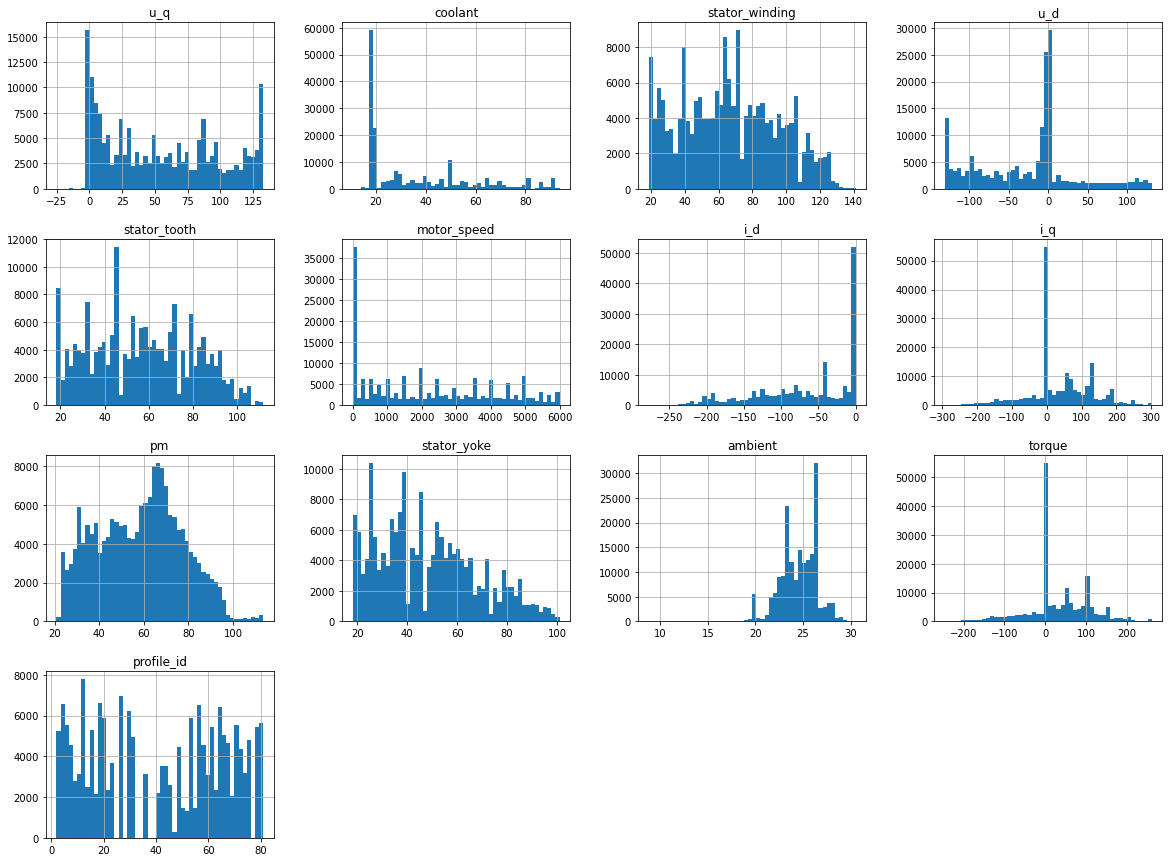

In [25]:
# Achtung, hier wird nur der gekürzte Trainingsdatensatz betrachtet
train_set_30.hist(bins=50, figsize=(20,15))
plt.show()

In [32]:
train_set_30_corr=train_set_30.corr()
train_set_30_corr['pm']

u_q               0.122820
coolant           0.465763
stator_winding    0.795089
u_d              -0.173103
stator_tooth      0.831392
motor_speed       0.459145
i_d              -0.427302
i_q              -0.143915
pm                1.000000
stator_yoke       0.755716
ambient           0.512295
torque           -0.118276
profile_id        0.384188
Name: pm, dtype: float64

<AxesSubplot:>

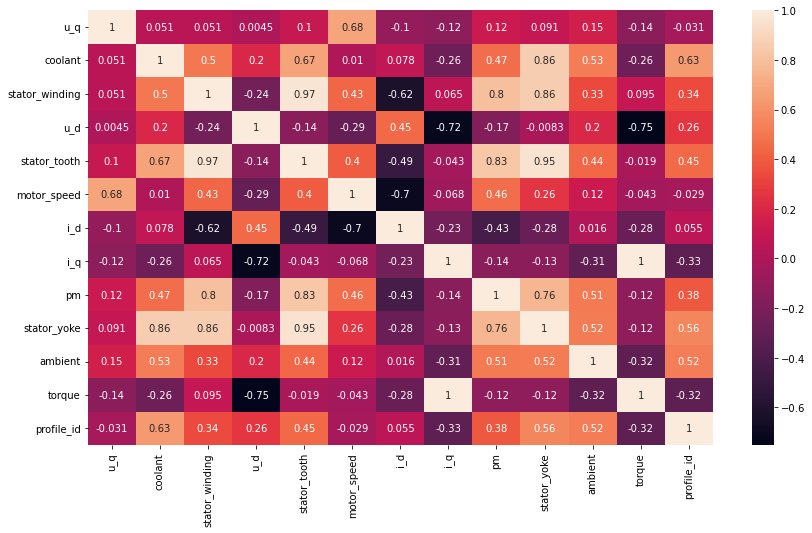

In [35]:
plt.figure(figsize=(14,8))
sns.heatmap(train_set_30_corr, annot = True)

Die oben dargestellte Korrelationsmatrix zeigt, die positiven oder negativen Korrelationen der einzelnen Attribute. Abseits der Diagonalen liegt eine sehr starke Korrelation von 1 bei den Attributen Drehmoment und i_q vor. Dieser Zusammenhand ist auf die Ansteuerung des Elektromotors zurückzuführen. Dabei hat i_q einen direkten Einfluss auf das Drehmoment.

In Bezug auf die Zielgröße `pm` lässt sich erkennen, dass die Temperaturen von Kühlmittel, Statorwicklung, Statorzähne und Stator Joch einen hohen positiven EInfluss auf die Rotortemperatur haben. Die Umgebungstemperatur, sowie die Drehzahl haben ebenfalls einen starken Einfluss.

## 4. Prepare the Data

- Write functions for all data transformations you apply.
- Clean the data.
- remove outliers
- fill in missing values
- Select important features (drop attributes that provide no useful information for the task).
- Use feature engineering.
- decompose categorical features
- add promising transformations for features
- aggregate features into promissing new features
- Use feature scaling (standardize or normalize features).

#### Data Cleaning

Das Attribut `profile_id` wird als überflüssig eingestuft, da die Zeitabhängigkeit des Datensatzes ignoriert wird. Aus diesem Grund wird dieses aus dem Trainings-, Validations- und Testdatensatz entfernt.

In [39]:
train_set.drop("profile_id", axis=1)
val_set.drop("profile_id", axis=1)
test_set.drop("profile_id", axis=1)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
424534,4.175080,18.298996,19.470448,1.480600,18.696995,99.981087,-2.000426,1.096520,23.368107,18.602362,23.012505,0.432702
1156633,67.859800,49.764450,91.840921,-112.387949,76.987543,1999.984498,-81.940312,186.695917,65.636679,65.033401,25.307312,150.000000
797076,131.343989,49.258930,78.709832,1.369659,70.546131,3548.406954,-42.277001,-2.599181,71.587023,60.658636,25.160387,-2.983891
1072024,131.524921,25.951773,63.920811,-3.017179,54.178931,3911.873574,-61.329965,0.374352,55.706147,42.770511,26.341890,-0.624918
359348,12.060310,18.289375,19.823488,0.764874,19.210705,250.003128,-2.000953,1.096710,26.102446,19.062996,23.261389,0.111280
...,...,...,...,...,...,...,...,...,...,...,...,...
895521,1.391687,29.560364,48.713180,0.829883,44.405325,0.037544,-2.000949,1.097093,46.224636,38.253773,25.626079,-0.000009
1181745,46.043545,49.834344,124.312847,-111.816101,96.805784,1646.706742,-120.961129,239.725071,68.544816,78.571610,25.546716,197.595152
591415,31.092173,18.406639,58.811481,-40.752422,44.900383,749.998962,-65.979172,172.999023,44.783436,35.535587,23.953117,139.245209
664020,77.574078,28.648232,64.002792,105.953221,54.530234,3302.817547,-106.366833,-103.099632,68.083803,43.460085,25.392192,-89.960276


#### Feature Scaling

Normalisieren der Daten für den Machine Learning Algrithmus

In [41]:
from sklearn.preprocessing import MinMaxScaler

# scale all data points between 0 and 1
scaler_normalization = MinMaxScaler(feature_range=(0,1))

train_set_normalized = scaler_normalization.fit_transform(train_set)

train_set_normalized

array([[0.72386469, 0.62882698, 0.57594597, ..., 0.73068207, 0.58420257,
        0.49367089],
       [0.40650692, 0.45244168, 0.76597273, ..., 0.75590371, 0.64536796,
        0.58227848],
       [0.70733498, 0.10101775, 0.43603769, ..., 0.67783096, 0.58133753,
        0.18987342],
       ...,
       [0.46302778, 0.45433855, 0.24292215, ..., 0.69097181, 0.53493881,
        0.53164557],
       [0.41662102, 0.16048665, 0.61288268, ..., 0.71148303, 0.6827301 ,
        0.49367089],
       [0.21220616, 0.129499  , 0.43236268, ..., 0.46142999, 0.99913458,
        0.43037975]])

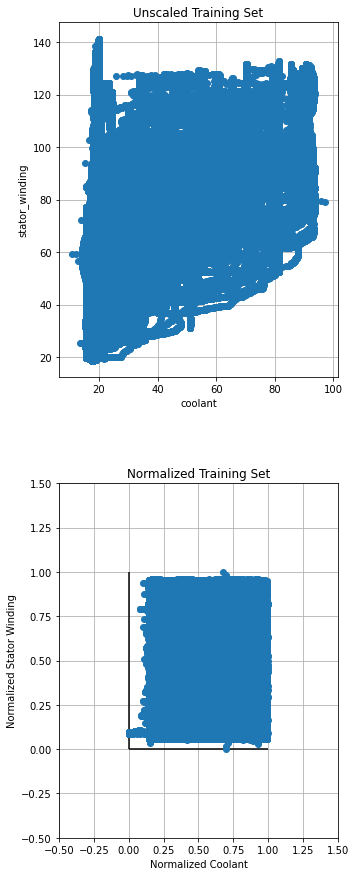

In [45]:
fig, ax = plt.subplots(2,1,figsize=(5,15))
plt.subplots_adjust(hspace=0.3)

ax[0].scatter(train_set['coolant'],train_set['stator_winding'], zorder=3)
ax[0].set(xlabel='coolant', ylabel='stator_winding', title='Unscaled Training Set')
ax[0].grid(zorder=0)

ax[1].scatter(train_set_normalized[:,0], train_set_normalized[:,1], zorder=3)
# Change zorder to zorder=1. Vertical lines will appear over the points
ax[1].set(xlim=[-0.5,1.5], ylim=[-0.5,1.5], xlabel='Normalized Coolant', ylabel='Normalized Stator Winding', title='Normalized Training Set')
ax[1].vlines(x=0, ymin=0, ymax=1, colors='k', linestyles='solid', zorder=2)
ax[1].hlines(y=0, xmin=0, xmax=1, colors='k', linestyles='solid', zorder=2)
ax[1].grid(zorder=0)

plt.show()